################MSE######################
MSE = 0.040
#########################################
################Noise####################
The estimated noise parameter (varaince) is tensor([0.0019])
The estimated noise std is tensor([0.0432])
#########################################


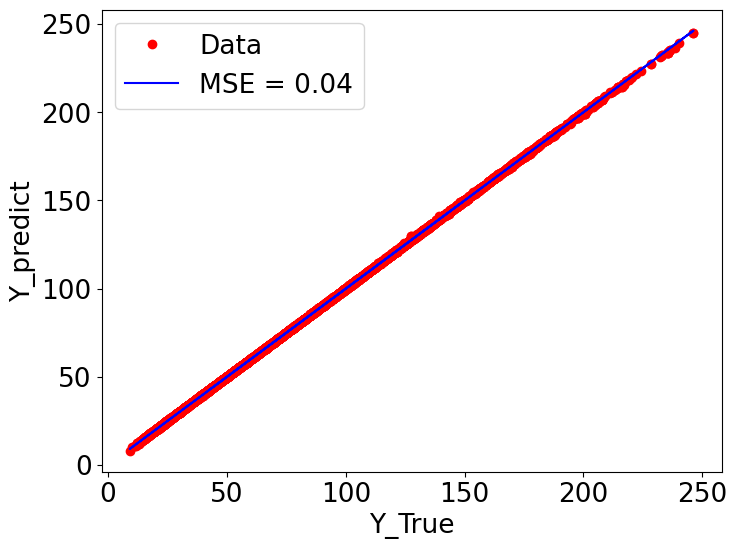

In [1]:
#!/usr/bin/env python
import torch
from lmgp_pytorch.models import LMGP
from lmgp_pytorch.test_functions.physical import borehole
from lmgp_pytorch.preprocessing import train_test_split_normalizeX
from lmgp_pytorch.utils import set_seed
from lmgp_pytorch.optim import fit_model_scipy

random_state = 12345
set_seed(random_state)


############################ Generate Data #########################################
X, y = borehole(n=10000, random_state=12345)
############################## train test split ####################################
Xtrain, Xtest, ytrain, ytest = train_test_split_normalizeX(
    X, y, test_size=0.99)
############################### Model ##############################################
model = LMGP(Xtrain, ytrain)
############################### Fit Model ##########################################
_ = fit_model_scipy(model, num_restarts=12)
############################### Score ##############################################
model.score(Xtest, ytest, plot_MSE=True)
model.show()
